# Task 2.3 Visualization Fundamentals

In [1]:
# import libraries
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [3]:
# import csv file
dtype_mapping = {6: str, 8: str} # force columns as string data types
df = pd.read_csv('NY_Citi_Bike_Weather_Data.csv', dtype=dtype_mapping, index_col=0)

In [7]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [10]:
# drop _merge column
df.drop(columns = {'_merge'}, inplace = True)

In [14]:
df.shape

(29838806, 15)

In [16]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [18]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:22:31.463,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:41:43.422,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 11:06:35.227,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3
3,F853B50772137378,classic_bike,2022-01-03 09:10:50.475,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:34:57.474,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9


In [21]:
df['date'] = pd.to_datetime(df['date'])

In [80]:
# ran into too many errors and need a smaller data set
# sample 10% of rows from each date
df_sample = df.groupby('date', group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))

MemoryError: Unable to allocate 2.00 GiB for an array with shape (9, 29838806) and data type object

### Pandas Plot of 2022 Weather

In [24]:
# create data subset
df_day_temp = df[['date', 'avgTemp']]

In [27]:
df_day_temp = df.set_index('date')

In [74]:
df_day_temp.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
dtype: object

In [33]:
# set data limit, it is too much to plot (this step is plt and not pd)
plt.rcParams['agg.path.chunksize'] = 10000

In [47]:
# set threshold limit, data limit was not enough
plt.rcParams['path.simplify_threshold'] = 0.5

<Axes: xlabel='date'>

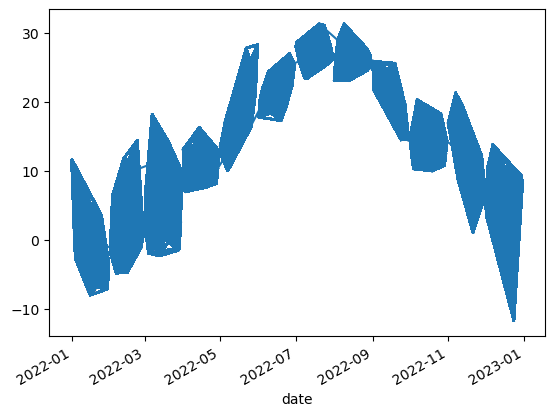

In [49]:
df_day_temp['avgTemp'].plot()

#### This looks strange but it is because of the data limit and my comupter's limited processing power. The pattern is still very visible.

# Aggregate Trip Data

In [45]:
# add new column of total trip counts by date
df['trip_count'] = df.groupby('date')['ride_id'].transform('count')

In [53]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,trip_count
0,BFD29218AB271154,electric_bike,2022-01-21 13:22:31.463,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0,33587
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:41:43.422,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6,34607
2,95893ABD40CED4B8,electric_bike,2022-01-26 11:06:35.227,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3,41997
3,F853B50772137378,classic_bike,2022-01-03 09:10:50.475,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4,33201
4,7590ADF834797B4B,classic_bike,2022-01-22 14:34:57.474,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9,31907


In [56]:
# create data subset
df_day_rides = df[['date', 'trip_count']]

In [58]:
df_day_rides = df.set_index('date')

# Dual Axis Graph with Matplotlib

In [66]:
# create sample sizes
df_sample_temp = df_day_temp.sample(100000)

In [67]:
df_sample_rides = df_day_rides.sample(100000)

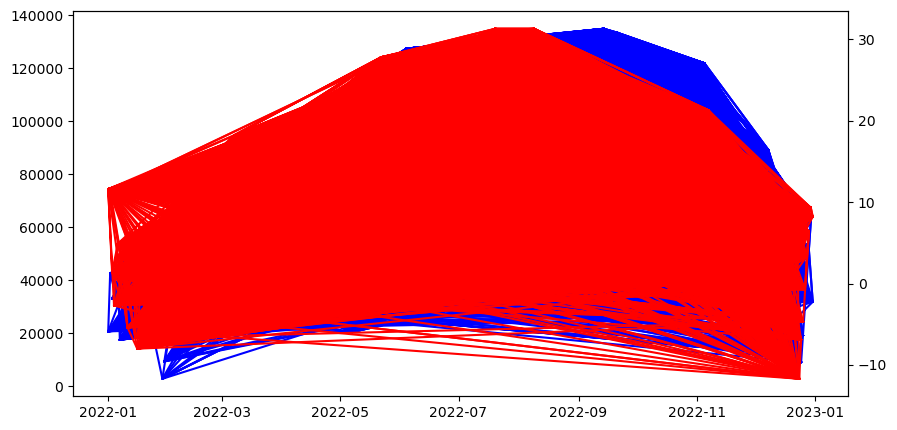

In [72]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(10, 5))

# make plot of the bike rides
ax.plot(df_sample_rides['trip_count'], color = "blue")

# initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# make plot with the temperatues on the y-axis using second axis object
ax2.plot(df_sample_temp["avgTemp"], color = "red")
plt.show()